In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
display(train.head(), test.head())
display(train, test)
#display로 보았을때 PassengerId는 각각 다 다르다는 것을 알 수 있다
#생존을 예측하는데에 있어서 Cabin, Ticket의 넘버는 상관이 없다고 생각한다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [59]:
sum(train.duplicated()), sum(test.duplicated()) #데이터가 중복 되었는지 확인한다

(0, 0)

In [60]:
train.info() # train의 column의 데이터 형을 본다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
#생존을 예측하는데 필요없는 데이터 Ticket과 Cabin을 제거한다
train = train.drop(["Ticket","Cabin","Name"],axis=1)
test = test.drop(["Ticket","Cabin","Name"],axis=1)
display(train, test)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [62]:
#성별에 따라서 데이터를 나누기 위해 Object형인 데이터를 int형인 남자는 0 여자는 1로 바꾼다
train["Sex"] = train["Sex"].map( {"male" : 0, "female" : 1})
test["Sex"] = test["Sex"].map( {"male" : 0, "female" : 1})
print(train.describe())
print(test.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  714.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.699118   
std     257.353842    0.486592    0.836071    0.477990   14.526497   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   20.125000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   38.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000

In [63]:
train.groupby("Pclass")["Survived"].mean()
#티켓의 클래스가 높을수록 사는 사람이 많다는 의미 있는 지표를 알 수 있다

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [64]:
train.groupby("Sex")["Survived"].mean()
#여성일수록 살 확률이 높았다

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [65]:
train.groupby("Survived")["Age"].mean()
#젊을수록 살 확률이 높다는 것을 알 수 있다

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [66]:
train.groupby("SibSp")["Survived"].mean()
#같이 탑승한 형제나 배우자가 없을수록 살 확률이 높다는 것을 알 수 있다

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [67]:
train.groupby("Parch")["Survived"].mean()
#같이 탑승한 부모나 아이가 있을수록 살 확률이 높다는 것을 알 수 있다

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [68]:
train.groupby("Survived")["Parch"].mean()

Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

In [69]:
train.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [70]:
train[["Sex","Pclass","Survived"]].groupby(["Sex","Pclass"], as_index=True).mean().sort_values(by='Survived', ascending = False)

Survived
Sex Pclass          
1   1       0.968085
    2       0.921053
    3       0.500000
0   1       0.368852
    2       0.157407
    3       0.135447

In [71]:
train[["Sex", "Embarked","Survived"]].groupby(["Sex", "Embarked"], as_index=True).mean().sort_values(by='Survived', ascending = False)

Survived
Sex Embarked          
1   C         0.876712
    Q         0.750000
    S         0.689655
0   C         0.305263
    S         0.174603
    Q         0.073171

<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

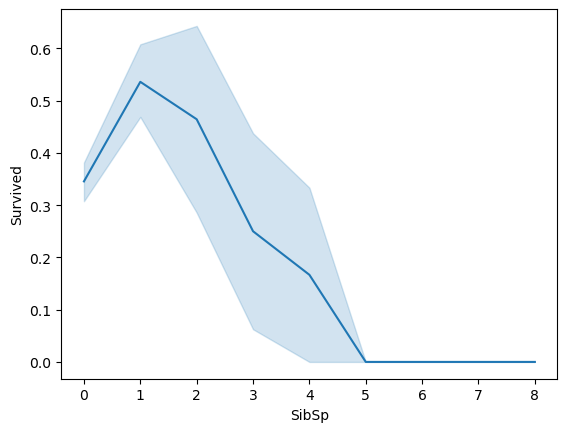

In [72]:
sns.lineplot(x = train["SibSp"], y = train["Survived"])

In [73]:
train[['Pclass', 'Embarked','PassengerId']].groupby(['Embarked', 'Pclass'], as_index=True).count().sort_values(by='Embarked', ascending = True)

PassengerId
Embarked Pclass             
C        1                85
         2                17
         3                66
Q        1                 2
         2                 3
         3                72
S        1               127
         2               164
         3               353

In [74]:
train[['Pclass', 'Embarked','PassengerId']].groupby(['Embarked', 'Pclass'], as_index=True).count().sort_values(by='Embarked', ascending = True)

PassengerId
Embarked Pclass             
C        1                85
         2                17
         3                66
Q        1                 2
         2                 3
         3                72
S        1               127
         2               164
         3               353

In [75]:
train["family"] = train["SibSp"] + train["Parch"] + 1
test["family"] = test["SibSp"] + test["Parch"] + 1
train = train.drop(["SibSp", "Parch"], axis=1)
test = test.drop(["SibSp", "Parch"], axis=1)
print(train.describe())
print(test.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  714.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.699118   
std     257.353842    0.486592    0.836071    0.477990   14.526497   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   20.125000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   38.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

             Fare      family  
count  891.000000  891.000000  
mean    32.204208    1.904602  
std     49.693429    1.613459  
min      0.000000    1.000000  
25%      7.910400    1.000000  
50%     14.454200    1.000000  
75%     31.000000    2.000000  
max    512.329200   11.000000  
       PassengerId      Pclass         Sex         Age        Fare      family
co

<AxesSubplot: xlabel='family', ylabel='Survived'>

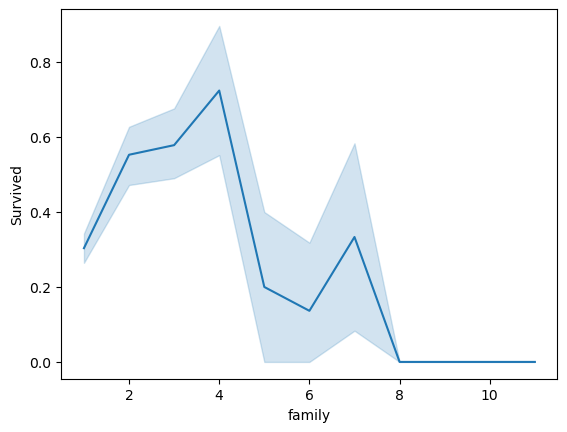

In [76]:
sns.lineplot(x = train["family"], y = train["Survived"])

<AxesSubplot: xlabel='family', ylabel='Survived'>

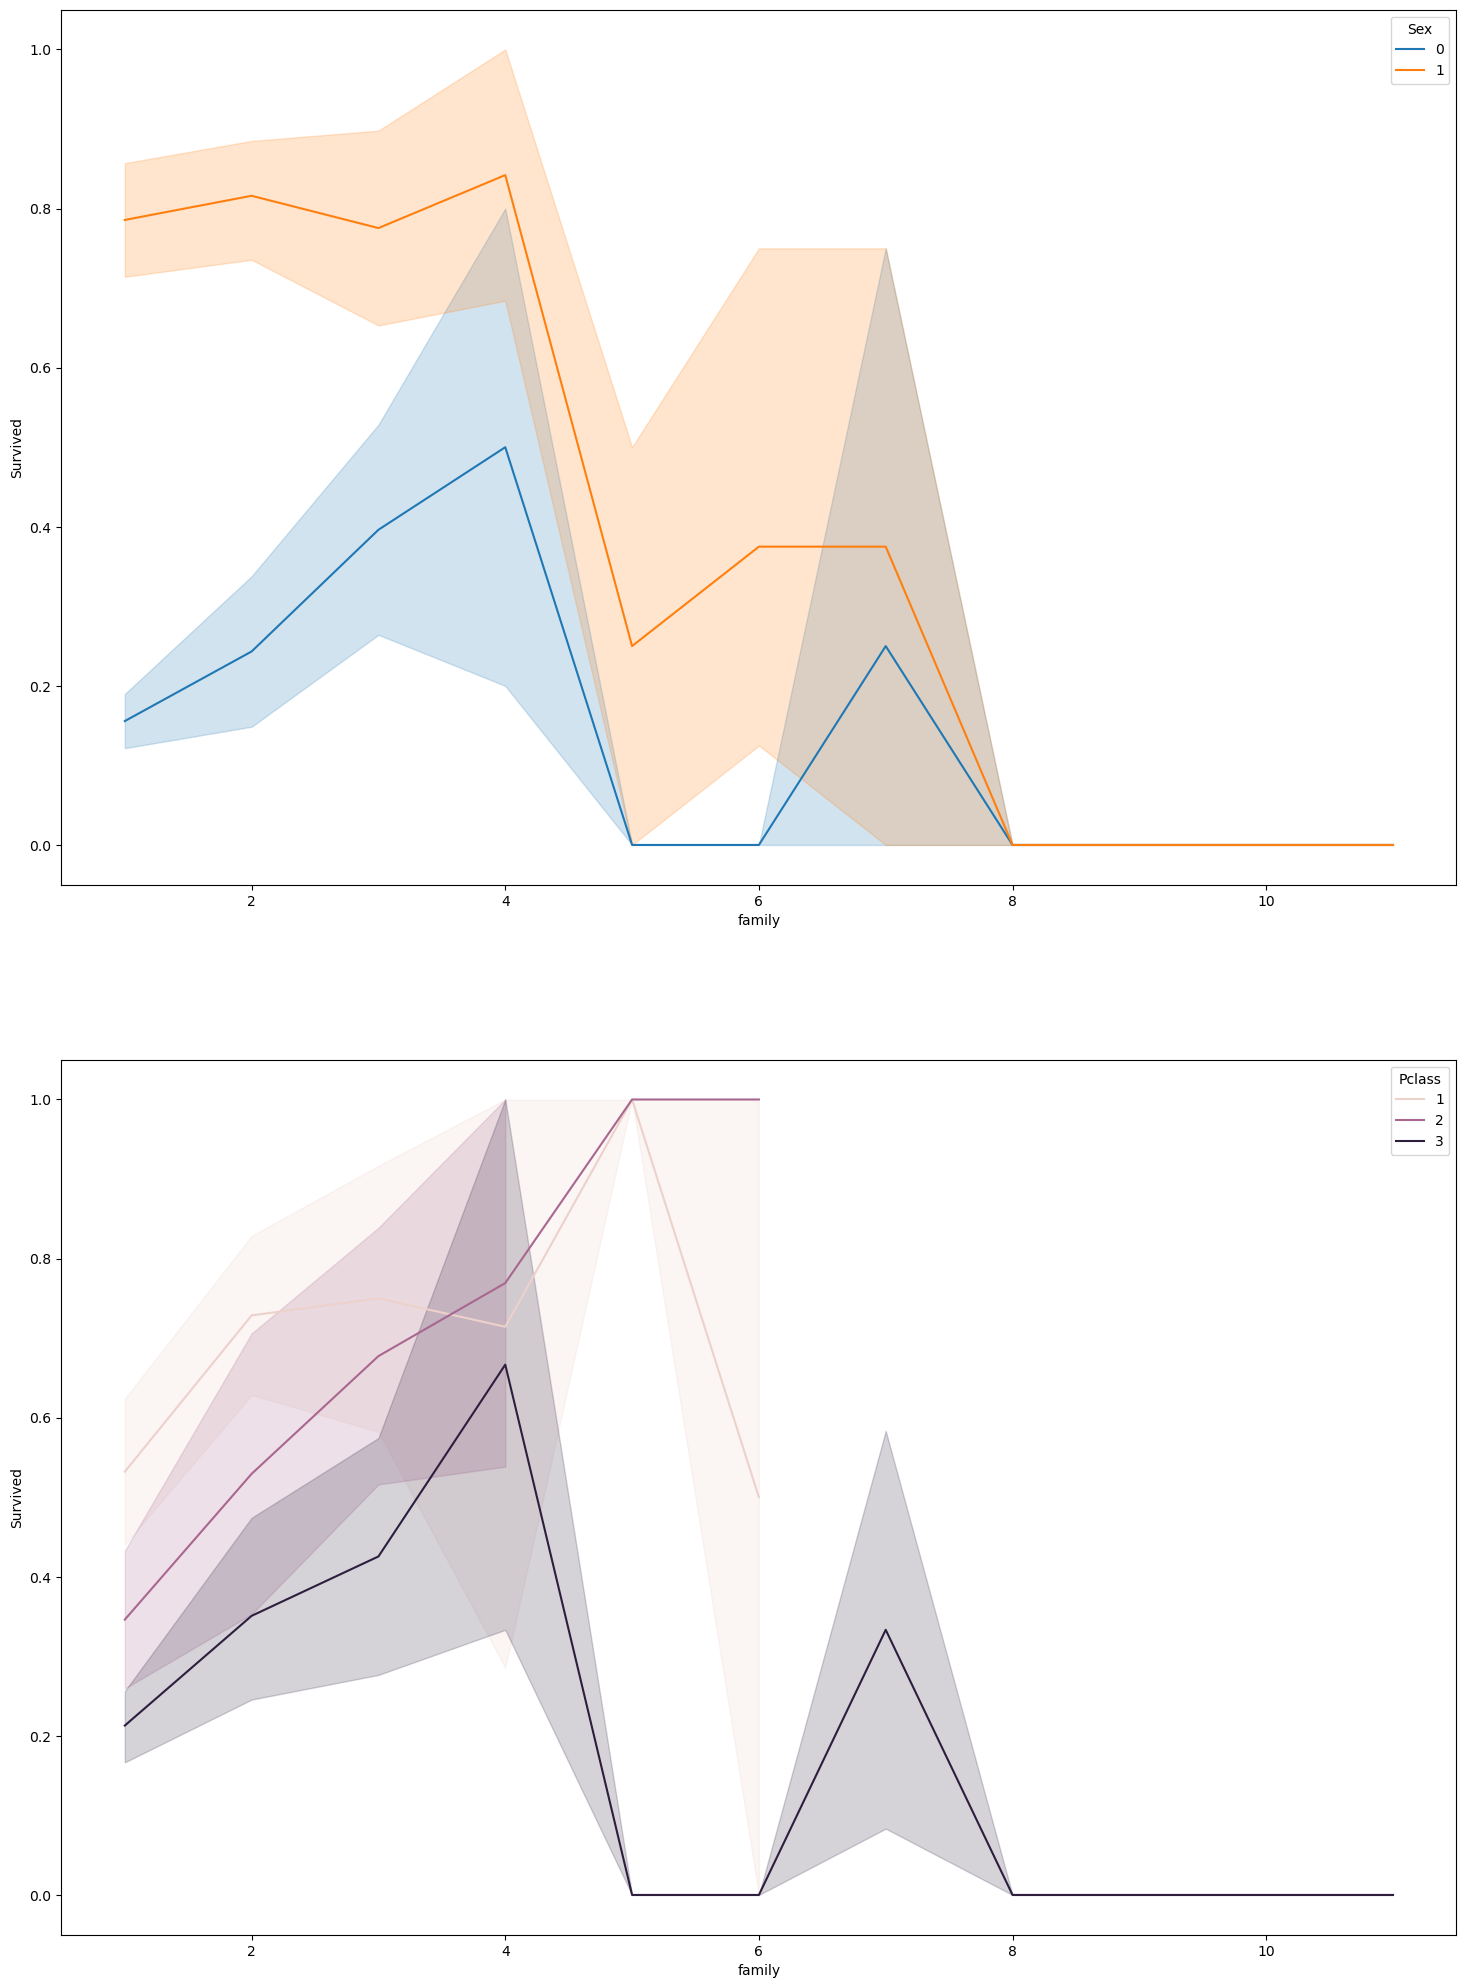

In [78]:
fig,(ax1, ax2)=plt.subplots(nrows=2)# 열로 5개를 생성
fig.set_size_inches(18,25)

sns.lineplot(data = train, x = "family", y = "Survived", hue = "Sex", ax=ax1)
sns.lineplot(data = train, x = "family", y = "Survived", hue = "Pclass")